0.Install Dependencies and Setup

In [1]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
import tensorflow as tf
import os # navigate file

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
len(gpus)

1

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

1.Remove dodgy images

In [5]:
import cv2   
import imghdr # 이미지 확장자를 확인해줌
from matplotlib import pyplot as plt

In [6]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
# 코드 설명을 위한 확인용 코드

image_exts[1]
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [8]:
# 코드 설명을 위한 확인용 코드 

os.listdir() # 현재 파일이 있는 폴더에 자료를 리스트로 보여줌
os.listdir(os.path.join(data_dir, 'Happy')) 
# 현재 파일 위치 폴더에 data_dir(data)와 'Happy'를 추가해서
# 그 위치에 있는 파일 목록을 보여줌

# 2개 이상의 폴더를 건너가고 싶으면 os.path.join()을 사용함

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '1000_F_273182118_bUqnM9i9UoyaB3gAN9XiojdNI6Mgs0tJ.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '105846315-makeit_04082019_bajuelos_jon_haidt_happiness_v2.00_03_34_04.still001.jpg',
 '170404-happy-workers-feature.jpg',
 '1902540.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '35438_hd.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '71hBPTAhIXL.jpg',
 '8fc39ae2301e4355a91340731ed2198f_320_320.jpeg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'box2_2_2210.png',
 'box2_slide6.png',
 'Dollarphotoclub_76084977-1.jpg',
 'dv2051009.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740.jpg',
 'getty_107808336_9708069704500170_5

In [9]:
# 코드 파악을 위한 테스트

# for image_class in os.listdir(data_dir):
#     print(image_class)
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         print(image)
# print(os.path.join(data_dir, image_class, image))

# img = cv2.imread(os.path.join('data', 'Sad', 'wp6905136.jpg'))
# print(img) # numpy로 읽음
# print(img.shape) # 높이(픽셀), 너비, 3가지 컬러 사용
# plt.imshow(img) # 이미지 보기

In [10]:
# 파일 위치를 이용해서 사용가능한 데이터 파일만 남겨두기

for image_class in os.listdir(data_dir): # data파일에 폴더 이름 가져오기(Happy, Sad)
    for image in os.listdir(os.path.join(data_dir, image_class)): 
    # data파일에 image_class(Happy, Sad)에 있는 파일 불러오기(image)
        image_path = os.path.join(data_dir, image_class, image)
        # 각각의 파일의 위치를 image_path에 저장함
        try: 
            img = cv2.imread(image_path) # 파일 위치에 있는 이미지 읽기(Numpy배열로 읽음)
            tip = imghdr.what(image_path) # 이미지의 확장자를 가져옴
            if tip not in image_exts:  # image_exts에 있는 확장자가 아닌경우 
                print('Image not in ext list {}'.format(image_path)) # 이미지 경로,이름을 출력하고
                os.remove(image_path) # data로 사용할 수 없기 때문에 삭제함
        except Exception as e: # 오류가 난다면
            print('Issue with image {}'.format(image_path)) # 오류 경로, 이름 출력하기 
            # os.remove(image_path)

2.Load Data

In [11]:
import numpy as np

In [12]:
# image_dataset_from_directory에 대한 설명 : 사이즈 통일 함수
data = tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export('keras.utils.image_dataset_from_directory',
              'keras.preprocessing.image_dataset_from_directory',
              v1=[])
def image_dataset_from_directory(directory,
                                 labels='inferred',
                                 label_mode='int',
                                 class_names=None,
                                 color_mode='rgb',
                                 batch_size=32,
                                 image_size=(256, 256),
                                 shuffle=True,
                                 seed=None,
               

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 164 files belonging to 2 classes.


In [14]:
len(data)

6

In [15]:
# # #  코드 분석을 위한 확인용 코드

# for element in data.as_numpy_iterator():
#     print(element)

# # tensorflow 참고 자료 : https://runebook.dev/ko/docs/tensorflow/data/experimental/sqldataset

# dataset = tf.data.Dataset.range(8)
# # dataset = dataset.batch(batch_size=3, drop_remainder=True)
# dataset = dataset.batch(batch_size=3, drop_remainder=False)
# list(dataset.as_numpy_iterator())

In [16]:
data_iterator = data.as_numpy_iterator()
# 데이터셋의 모든 요소를 numpy로 변환하는 반복자 역할, 데이터 파이프 라인에 해당
batch = data_iterator.next()
# Get another batch from the iterator

# print(len(batch)) 
# # 2 : 이미지와 lable을 의미함

# print(batch[0].shape) 
# # Images represented as numpy arrays
# # image_dataset_from_directory의 기본 값이 32,256,256,3으로 되어있음

# print(batch[1]) 
# # 1과 0으로 lable을 의미함. ( 0 : happy, 1 : sad )

In [17]:
# 왜지?
batch[0][0]
# batch[0].astype(int)

array([[[221.       , 144.       ,  26.       ],
        [221.       , 144.       ,  26.       ],
        [221.61328  , 144.61328  ,  26.613281 ],
        ...,
        [242.       , 191.       ,  74.       ],
        [242.       , 191.       ,  74.       ],
        [242.       , 191.       ,  74.       ]],

       [[221.       , 144.       ,  26.       ],
        [221.       , 144.       ,  26.       ],
        [221.97809  , 144.97809  ,  26.978096 ],
        ...,
        [242.       , 191.       ,  74.       ],
        [242.       , 191.       ,  74.       ],
        [242.       , 191.       ,  74.       ]],

       [[221.       , 144.       ,  26.       ],
        [221.16797  , 144.16797  ,  26.167969 ],
        [222.61328  , 145.61328  ,  27.613281 ],
        ...,
        [242.       , 191.       ,  74.       ],
        [242.       , 191.       ,  74.       ],
        [242.       , 191.       ,  74.       ]],

       ...,

       [[174.57227  ,  98.572266 ,   4.5722656],
        [17

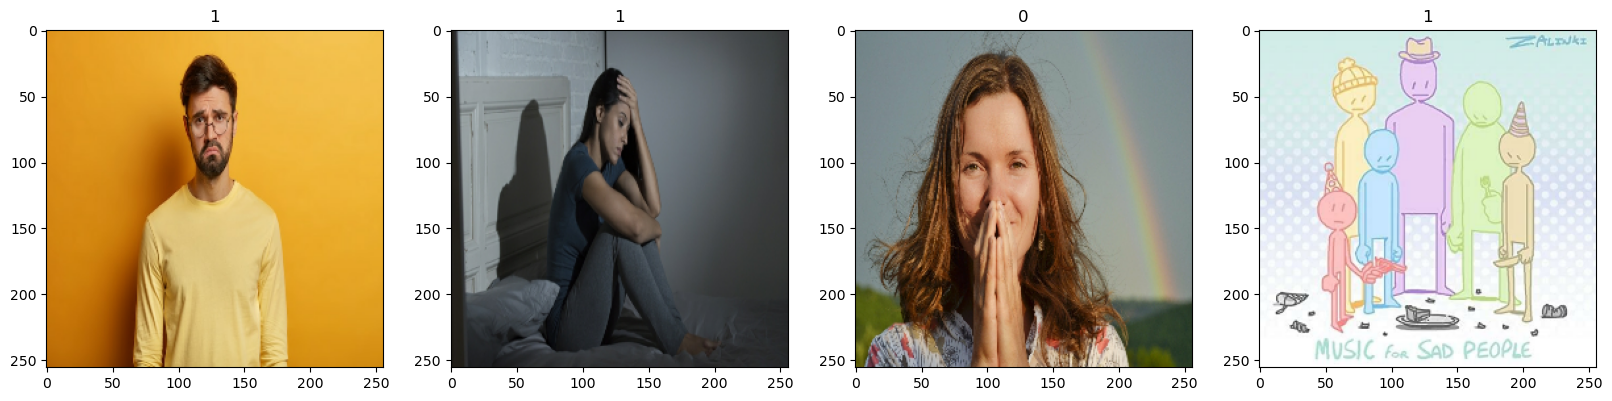

In [18]:
# batch(as_numpy_iterator）를 이용해서 subplot 배치 하기

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    # plot에 표현하기 위해 정수로 바꿈
    ax[idx].title.set_text(batch[1][idx])
    # 각각 lable을 title에 나타냄

### Preprocess Data

3.Scale Data

In [19]:
# 값을 0과 1사이로 scaling하기 위해서 max값을 찾아줌
batch[0].shape
batch[0].max() 

255.0

In [20]:
data = data.map(lambda x,y: (x/255, y))
# complete scaling 
batch = data.as_numpy_iterator().next()
# 다음 batch의 값을 가져옴
print(batch[0].min())
print(batch[0].max())

0.0
1.0


In [21]:
# # map 사용 방법 : map(적용할 함수, 적용할 대상) → map객체로 반환됨

# a = [1,2,3,4,5,6,7,8]
# list(map(lambda x: x/10, a))


4.Split Data

In [22]:
len(data)
# 6개의 batch가 있고 1개의 배치에 32개가 들어있음

# 6*.1

6

In [23]:
train_size = int(len(data)*.6)
# 훈련데이터 : 딥러닝 모델을 훈련시키는데 사용됨
# original data set을 사용하는 것은 모델 평가에 적합하지 않기 때문에
# 목적에 따라 데이터 세트를 분리하여 검증과 테스트를 진행해야 한다.

val_size = int(len(data)*.2)
# 검증용데이터 : 학습이 완료된 모델은 검증하기 위함
# 서로 다른 모델을 사용했을 때 성능을 비교 
# *하이퍼파라미터 조정으로 다른 모델 생성 : 계층, 에폭, 학습률

test_size = int(len(data)*.1)
# 검증용데이터가 과대적합된 데이터만 모여있을 수 있음
# 검증용데이터를 통해 결정된 성능이 가장 우수한 모델을 최종 테스트하기 위함

In [24]:
print(train_size) # batch 사이즈
print(val_size)   # 유효성 검사 2가지
print(test_size)  # 

3
1
0


In [25]:
# for a in data.take(5):
#     print(a)

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
# 이미 train에 할단된 batch는 건너뛰고
test = data.skip(train_size+val_size).take(test_size)

In [27]:
print(len(train))
print(len(val))
print(len(test))

3
1
0


Deep Learning

5.Build Deep Learning Model

In [28]:
# Conv2D, MaxPooling2D, Dense, Flatten, Dropout 설명

# Conv2D : Convolution layer
 # 출처 : https://velog.io/@byu0hyun/%EB%94%A5%EB%9F%AC%EB%8B%9D-CNN-Conv2D-Layer
 # 3x3 사이즈의 2개의 kernel(filter)를 거쳐 이미지의 특징맵output을 추출한다.
 # 이 때, 2개의 kernel(filter)를 거치기 때문에, output 특징맵은 2개의 Channel을 갖는다.
 
# MaxPooling2D
 # 출처 : https://dsbook.tistory.com/79
 # 이미지의 크기를 줄이면서 데이터의 손실을 막기 위해 사용하며, 합성곱 계층의 과적합을 방지하기 위함이기도 하다
 
 # 데이터를 회전하거나 특정좌표로 이동한 이미지, 글리치가 있거나 조금 잘린 이미지 데이터에 대해 융통성을 발휘하기 어렵다
 # 이런 과적합을 막기 위해 pooling계층을 사용하는데, Max와 Average Pooling 방법이 있다.
 
# Dense
 # 각각의 layer를 연결
 
# Flatten
 # 1차원으로 변경해줌

In [29]:
from tensorflow.keras.models import Sequential
# keras내부에서 2개 이상의 모델을 사용하기 위해서
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
# model = Sequential([Conv2D(), ])
model = Sequential()

In [31]:
# # MaxPooling2D 설명
# MaxPooling2D??

In [32]:
# layer층 쌓기

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
# Convolution을 적용하고 16개의 필터를 적용, 크기는 (3,3), 1칸씩 이동
# 입력값은 (256,256,3)형태이며, 활성함수는 relu사용 

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# sigmoid activation : output 0 or 1

In [33]:
# # 어떤 Optimizer 있는지 확인 
# tf.optimizers.

In [34]:
# model.compile()에서 Optimizer, Loss, Metrics 설정하기

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# 출처 : https://wooono.tistory.com/100
# Optimizer Function : adam
# Loss Function : 손실 검증 척도
        # tf.losses.BinaryCrossentropy() : 이진분류일 때 사용 - sigmoid
        # tf.keras.losses.CategoricalCrossentropy() : 다중 분류에 사용 [1,0,0] [0,1,0] [0,0,1] - softmax
        # tf.keras.losses.SparseCategoricalCrossentropy() : 클래스가 여러개인 다중분류 0,1,2 - softmax
# Metrics : 평가지표, log가 기록됨. 훈련과정을 모니터링하기 위함.
            # 분류에서는 accuracy, 회귀에서는 mse, rmse, r2, mae, mspe, mape, msle 등

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

6. Train

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


: 

: 

7.Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

8.Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


In [ ]:
print(pre.result(), re.result(), acc.result())

9.Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

In [ ]:
10. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))